In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [33]:
df = pd.read_csv("final_cars.csv")
df.head()

,URL,Price,Date,Make,Model,Year,Mileage_in_KM,Transmission,City,Color,Fuel_Type,Class,Body_Style,Cylinder_Count,Engine_Capacity
0,https://www.contactcars.com/en/used-cars/hyund...,800000,10/27/2025,Hyundai,Elantra HD,2022.0,30000.0,Automatic,Giza,Black,Gas,NaN,Sedan,\r,1600CC
1,https://www.contactcars.com/en/used-cars/ford-...,750000,10/27/2025,Ford,Focus,2018.0,120000.0,Automatic,Cairo,Brown,Gas,NaN,Sedan,\r,1000CC
2,https://www.contactcars.com/en/used-cars/byd-s...,2100000,10/27/2025,BYD,Song Plus,2025.0,2000.0,Automatic,Mansoura,Gray,Hybrid,NaN,SUV,4,1500CC
3,https://www.contactcars.com/en/used-cars/ford-...,900000,10/27/2025,Ford,Kuga,2018.0,145000.0,Automatic,Giza,Gray,Gas,NaN,SUV,3,1500CC
4,https://www.contactcars.com/en/used-cars/kia-s...,1300000,10/27/2025,Kia,Sportage,2021.0,170000.0,Automatic,Giza,Black,Gas,NaN,SUV,4,1600CC


In [7]:
df.shape

(10981, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10981 entries, 0 to 10980
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   URL              10981 non-null  object 
 1   Price            10981 non-null  int64  
 2   Date             10979 non-null  object 
 3   Make             10979 non-null  object 
 4   Model            10979 non-null  object 
 5   Year             10979 non-null  float64
 6   Mileage_in_KM    10932 non-null  float64
 7   Transmission     10981 non-null  object 
 8   City             10979 non-null  object 
 9   Color            10979 non-null  object 
 10  Fuel_Type        10981 non-null  object 
 11  Class            2075 non-null   object 
 12  Body_Style       10981 non-null  object 
 13  Cylinder_Count   3233 non-null   object 
 14  Engine_Capacity  3233 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.3+ MB


In [32]:
df.describe()

,Price,Year,Mileage_in_KM
count,8.236000e+03,8234.000000,8.231000e+03
mean,5.975290e+05,2013.107117,1.538025e+05
std,2.963730e+05,8.356617,1.253648e+05
min,0.000000e+00,1970.000000,0.000000e+00
25%,3.650000e+05,2009.000000,8.700000e+04
50%,5.800000e+05,2015.000000,1.465000e+05
75%,8.000000e+05,2019.000000,2.050000e+05
max,1.280000e+06,2026.000000,5.000000e+06


In [35]:
df['Price'].min(), df['Price'].max()

(0, 25000000)

In [38]:
IQR = df['Price'].quantile(0.75) - df['Price'].quantile(0.25)
lower_bound = 100000
upper_bound = df['Price'].quantile(0.75) + 1.5
lower_bound, upper_bound

(100000, np.float64(1280001.5))

In [39]:
#delete outliers
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [85]:
#delete Make were nom of sold cars < 100
make_counts = df['Make'].value_counts()
makes_to_keep = make_counts[make_counts >= 100].index
df = df[df['Make'].isin(makes_to_keep)]

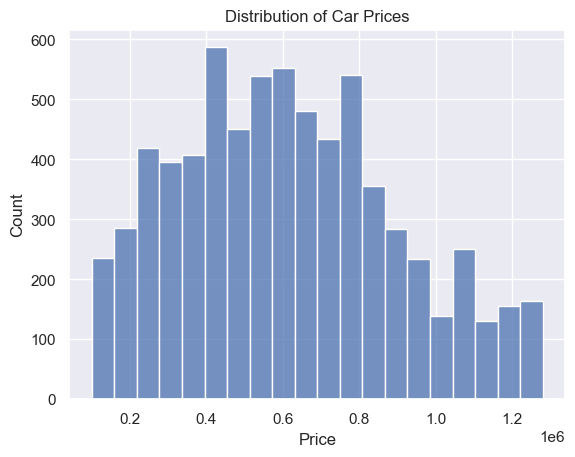

In [113]:
sns.histplot(df['Price'] , bins = 20)
plt.title('Distribution of Car Prices')
plt.show()

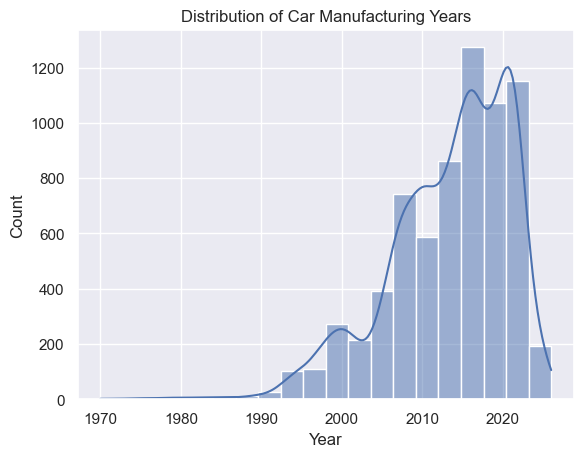

In [114]:
sns.histplot(df['Year'], bins=20, kde=True)
plt.title('Distribution of Car Manufacturing Years')
plt.show()

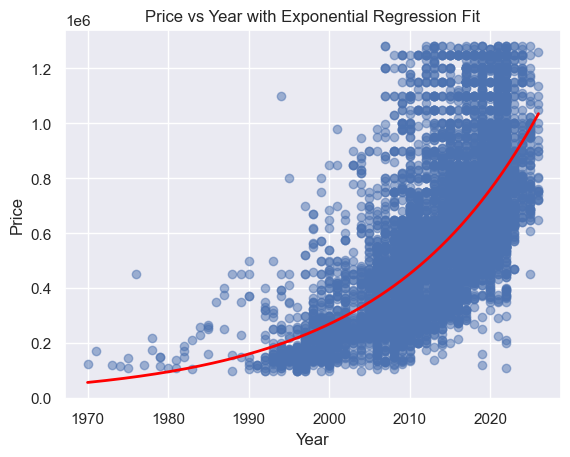

In [ ]:
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.scatter(df['Year'], df['Price'], alpha=0.5)
plt.title('Price vs Year with Exponential Regression Fit')
plt.xlabel('Year')
plt.ylabel('Price')

# ----- Exponential regression -----

# Prepare data
X = df['Year'].values.reshape(-1, 1)
y = df['Price'].values

# Only use positive prices for log transformation 
mask = y > 0
X_fit = X[mask]
y_fit = y[mask]

log_y = np.log(y_fit)

# Fit linear
model = LinearRegression()
model.fit(X_fit, log_y)

# Predict exponential curve
x_pred = np.linspace(df['Year'].min(), df['Year'].max(), 200)
log_y_pred = model.predict(x_pred.reshape(-1, 1))
y_pred = np.exp(log_y_pred)   # back-transform

# Plot regression curve in red
plt.plot(x_pred, y_pred, color='red', linewidth=2)

plt.show()

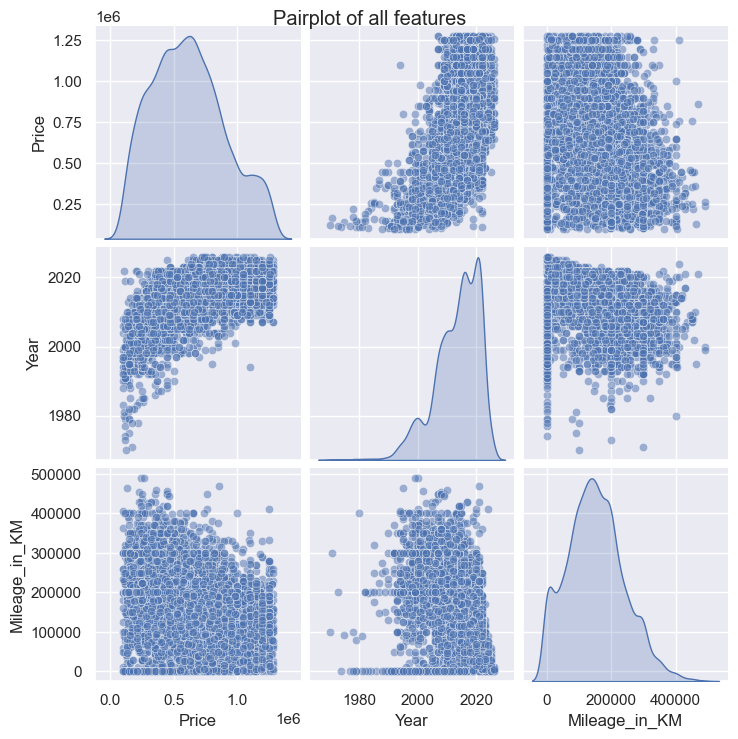

In [141]:
df_clean = df[
    (df['Mileage_in_KM'] < 500000)
]
sns.pairplot(df_clean, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of all features')
plt.show()

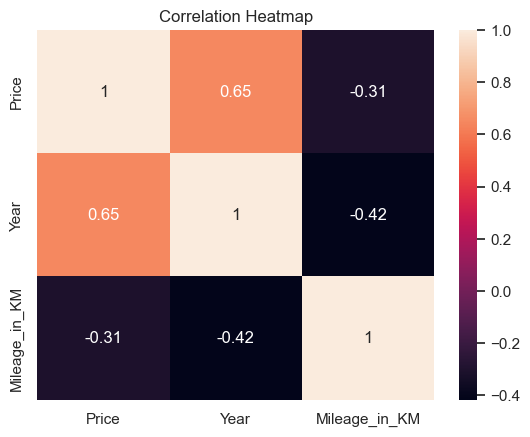

In [142]:
sns.heatmap(df_clean.corr(numeric_only=True).dropna(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

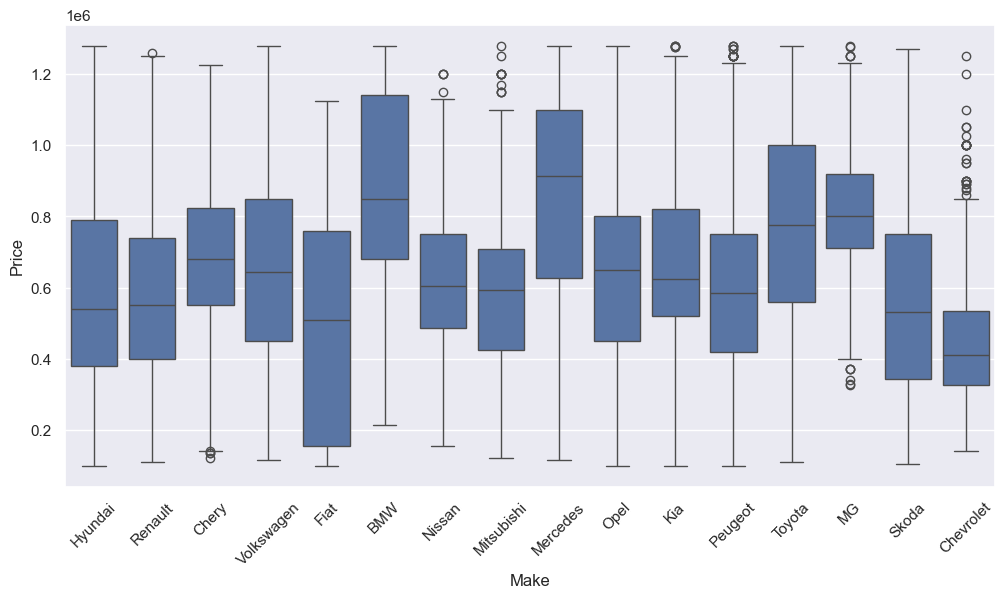

In [144]:
frequent_makes = df['Make'].value_counts()[lambda s: s > 200].index
x = df[df['Make'].isin(frequent_makes)]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Make', y='Price', data=x)
plt.xticks(rotation=45)
plt.show()

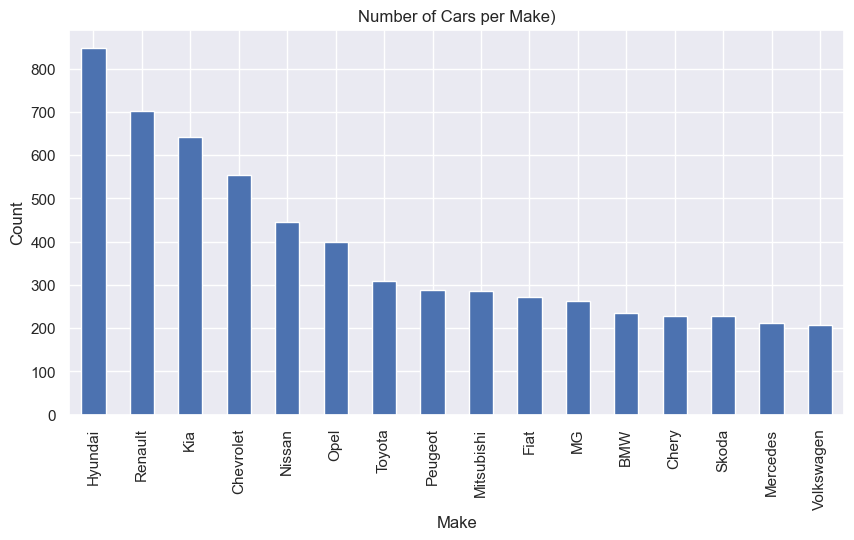

In [148]:
x['Make'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('Number of Cars per Make)')
plt.ylabel('Count')
plt.show()


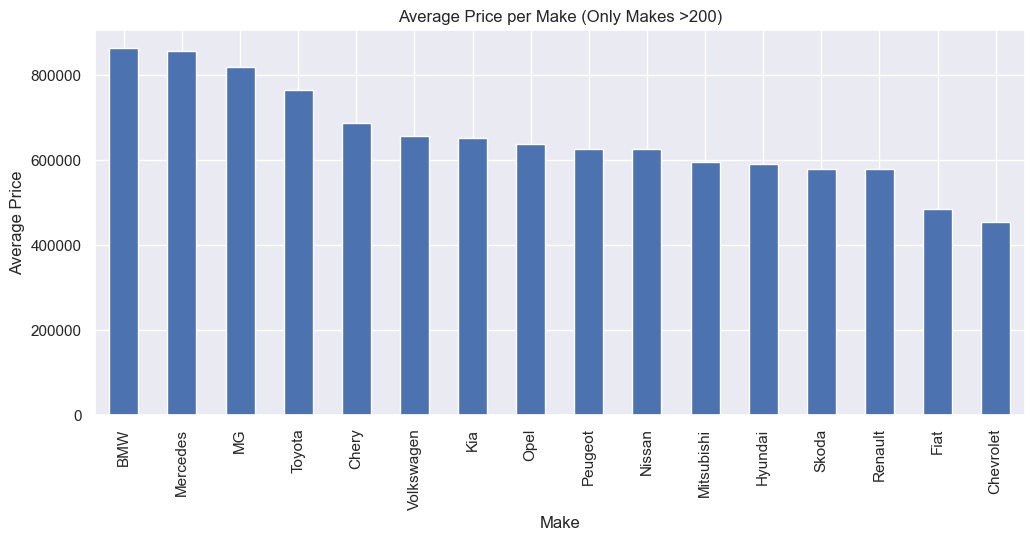

In [149]:
x.groupby('Make')['Price'].mean().sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,5)
)
plt.title('Average Price per Make (Only Makes >200)')
plt.ylabel('Average Price')
plt.xlabel('Make')
plt.show()